In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from proj1_utils import *
from proj1_visualization import *
from proj1_cross_validation import *
from implementations import *

%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [4]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'  
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
DATA_TEST_PATH = '../data/test.csv' 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

# Explore the data

In [5]:
cat_cols = [22]           # PRI_jet_num: the only categorical column
tX_num, tX_cat = split_numerical_categorical(tX,cat_cols)

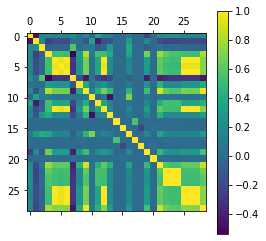

In [6]:
plt.matshow(np.corrcoef(tX_num,rowvar=False))
plt.colorbar()

In [7]:
np.corrcoef(tX_num[:,22:25],rowvar = False)

array([[1.        , 0.99610001, 0.9960998 ],
       [0.99610001, 1.        , 0.99999184],
       [0.9960998 , 0.99999184, 1.        ]])

In [8]:
np.corrcoef(tX_num[:,25:28],rowvar = False)

array([[1.        , 0.99935235, 0.99935185],
       [0.99935235, 1.        , 0.99999477],
       [0.99935185, 0.99999477, 1.        ]])

In [9]:
corr_cols = [4,6,25,26,23,24]
tX_num_uncorr = np.delete(tX_num,corr_cols,axis = 1)

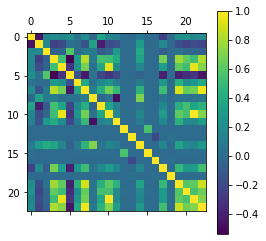

In [10]:
plt.matshow(np.corrcoef(tX_num_uncorr,rowvar=False))
plt.colorbar()

In [11]:
tX_test_num, tX_test_cat = split_numerical_categorical(tX_test,cat_cols)

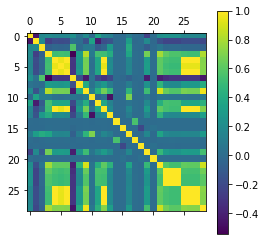

In [12]:
plt.matshow(np.corrcoef(tX_test_num,rowvar=False))
plt.colorbar()

In [13]:
tX_test_num_uncorr = np.delete(tX_test_num,corr_cols,axis = 1)

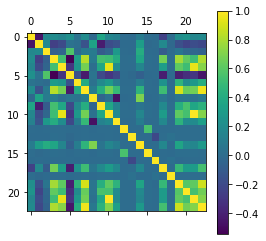

In [14]:
plt.matshow(np.corrcoef(tX_test_num_uncorr,rowvar=False))
plt.colorbar()

# Preprocessing

Aquí debemos mostrar el preprocessing. Sin embargo también tenemos que tener los datos sin preprocessing para que podamos utilizarlos y comparar.

In [15]:
# Treat numerical values
best_degree = 3
full_x_train_num_nan = replace_undef_val_with_nan(tX_num_uncorr)
full_x_train_num_std, train_mean, train_std = nan_standardize_fit(full_x_train_num_nan)
# full_x_train_num_valid_std = replace_nan_val_with_mean(full_x_train_num_nan_std)
full_x_train_num_valid = replace_nan_val_with_median(full_x_train_num_std)
full_x_train_num_valid = replace_iqr_outliers(full_x_train_num_valid)
# Treat categorical values
full_x_train_ohe_cat = one_hot_encode(tX_cat)
full_x_train_poly = build_poly(full_x_train_num_valid , best_degree)
full_x_train = np.hstack((full_x_train_poly,full_x_train_ohe_cat))
# Treat labels
full_y_train = y
# full_y_train = relabel_y_non_negative(y).reshape(-1,1)

In [16]:
x_train, y_train, x_val, y_val = split_data(full_x_train,full_y_train,0.8)

In [17]:
# Treat numerical values
x_test_num_nan = replace_undef_val_with_nan(tX_test_num_uncorr)
x_test_num_nan_std = nan_standardize_transform(x_test_num_nan,train_mean,train_std)
# x_test_num_nan_std = nan_standardize_with_median_transform(x_test_num_nan,train_median,train_std)
x_test_num_valid_std = replace_nan_val_with_median(x_test_num_nan_std)
x_test_num_valid_std = replace_iqr_outliers(x_test_num_valid_std)
# x_test_num_valid_std = replace_nan_val_with_mean(x_test_num_nan_std)
x_test_ohe_cat = one_hot_encode(tX_test_cat)
x_test_poly = build_poly(x_test_num_valid_std , best_degree)
x_test = np.hstack((x_test_poly,x_test_ohe_cat))

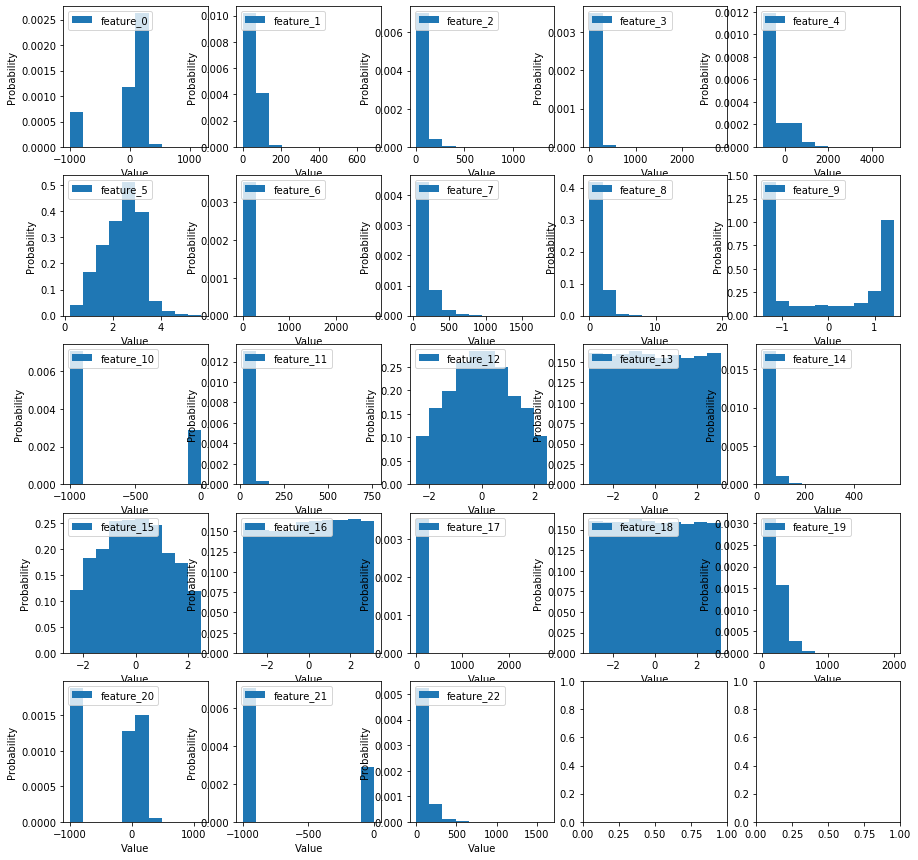

In [18]:
multiHistPlots(tX_num_uncorr)

### Explore feature 12: Det_met_phi_centrality

# Model selection

Aquí se hará una presentará una lista de variables que el usuario para que pueda escoger el método method = ... y los parámetros.

Para cada modelo se debe mostrar cómo se encontraron los hiper parámetros (k_fold = 1). (Esto puede estar comentado pero debe funcionar)

Para cada modelo entonces se pondrán los mejores parámetros que encontramos


In [29]:
"""
least_squares_GD(y, tx, initial_w, max_iters, gamma)                  Linear regression using gradient descent
least_squares_SGD(y, tx, initial_w, max_iters, gamma)                 Linear regression using stochastic gradient descent
least_squares(y, tx)                                                  Least squares regression using normal equations 
ridge_regression(y, tx, lambda_)                                      Ridge regression using normal equations
logistic_regression(y, tx, initial_w, max_iters, gamma)               Logistic regression using GD or SGD
logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma)      Regularized logistic regression using GD or SGD
"""

method = 1

y = y_train
tx = x_train
initial_w = np.zeros(tx.shape[1])
max_iters = 1000
gamma = 0.06
lamda_ = 0 

In [30]:
if method == 1:
    #the function how the get the hyper_parameters commented
    w, loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)
elif method == 2:
    #the function how the get the hyper_parameters commented
    w, loss = least_squares_SGD(y, tx, initial_w, max_iters, gamma)
elif method == 3:
    #the function how the get the hyper_parameters commented
    w, loss = least_squares(y, tx)
elif method == 4:
    #the function how the get the hyper_parameters commented
    w, loss = ridge_regression(y, tx, lambda_)
elif method == 5:
    #the function how the get the hyper_parameters commented
    w, loss = logistic_regression(y, tx, initial_w, max_iters, gamma)   
elif method == 6:
    #the function how the get the hyper_parameters commented
    w, loss = logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma)
else:
    print('method incorrect')

GD(1/999): loss=0.4076599216452628, w0=-0.0189378, w1=0.00688949277203922
GD(51/999): loss=0.3055693055734194, w0=-0.03110885052871035, w1=0.12067334037697643
GD(101/999): loss=0.2975882285409785, w0=-0.03303438292518387, w1=0.18902144301426346
GD(151/999): loss=0.29439897440637514, w0=-0.029525271184950536, w1=0.2392832814574168
GD(201/999): loss=0.29236545973930544, w0=-0.024699944685445056, w1=0.28084031352549316
GD(251/999): loss=0.29085050996948053, w0=-0.01992492371845561, w1=0.31752851513062413
GD(301/999): loss=0.28965839764231155, w0=-0.01562554354553571, w1=0.3509228728028145
GD(351/999): loss=0.2886923010385576, w0=-0.011902001240219973, w1=0.38175535509186337
GD(401/999): loss=0.287892426732061, w0=-0.008740134663234008, w1=0.4104345192514029
GD(451/999): loss=0.2872186638727773, w0=-0.006087364596011288, w1=0.43723227383105806
GD(501/999): loss=0.2866430193328879, w0=-0.0038811995569249668, w1=0.46235290950092917
GD(551/999): loss=0.2861454195741228, w0=-0.0020601761582270

# Cross Validation

In [ ]:
##### Put the stuff to know if there is no overfitting

## Generate predictions and save ouput in csv format for submission:

In [31]:
y_pred = predict_labels(w, x_val)
y_val = relabel_y_negative(y_val)

In [32]:
# Just to check
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, recall_score, precision_score
print(confusion_matrix(y_val,y_pred))
print(accuracy_score(y_val,y_pred))
print(f1_score(y_val,y_pred))
print(recall_score(y_val,y_pred))
print(precision_score(y_val,y_pred))

[[28776  3994]
 [ 5740 11490]]
0.80532
0.7024515497951946
0.6668601276842716
0.742056316197365


In [33]:
get_label_y_counts(y_pred)

(array([-1.,  1.]), array([34516, 15484]))

In [34]:
OUTPUT_PATH = '../output_submission/submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, x_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined